In [1]:
"""
A simple example of stochastic gradient descent with a learning rate
"""

#Load libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Define learning rate function

def learning_rate(t,t0=1,t1=100):
    """
    Learning rate function
    #Arguments
    t, int: current learning rate time step which is modelled based on the epoch
    t0, int: baseline learning rate, set to 1 as a default
    t1 int: baseline learning rate to scale, set to 100 as a default
    #Returns
    """
    return t0/(t+t1)

In [3]:
def GradientDescent(X,ypred,y):
    """
    Gradient descent function
    #Arguments

    X, array(int/float): sample values
    y, array(int/float): actual values
    ypred, array(int/float): prediced values

    #Returns
    Jacobian for the gradient with respect to theta
    """
    grad=2*np.dot(X.T,(ypred-y)) #MSE grad with respect ypred theta
    return grad

[[ 1.10940050e+00  1.00000000e+00]
 [ 9.24770728e-01  1.00000000e+00]
 [-6.55208894e-01  1.00000000e+00]
 [-1.61500054e+00  1.00000000e+00]
 [-1.51234153e-03  1.00000000e+00]
 [ 1.38286962e+00  1.00000000e+00]
 [-1.04765089e+00  1.00000000e+00]
 [-2.56232330e-01  1.00000000e+00]
 [ 1.01898632e-01  1.00000000e+00]]
[[ 12.10433672]
 [ 49.7499947 ]
 [ 15.77206378]
 [-33.29562976]
 [ 17.71396432]
 [ 40.17827451]
 [-30.80646784]
 [ 14.01980041]
 [-42.45739403]]


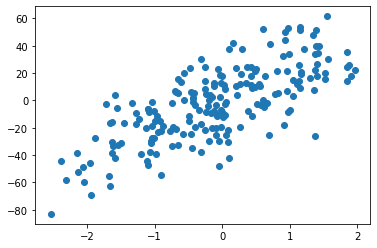

In [10]:
#Generate test data for a simple linear model
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, noise=20)
X=np.c_[X,np.ones((200,1))]
y=y.reshape(200,1)
print(X[1:10])
print(y[1:10])

plt.scatter(X[:,0],y)
plt.show()


In [ ]:
#Generate test data for a simple linear model using an alternative method

X=np.linspace(-2,2,200)
X=np.c_[X,np.ones((200,1))]


theta=np.array([[4],[3]])

noise=np.random.normal(0,1,200)
noise=noise.reshape(-1,1)
y=np.dot(X,theta)+noise

plt.scatter(X[:,0],y)
plt.show()

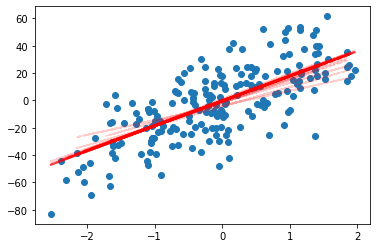

In [11]:
EPOCHS=50
SAMPLES_N=50 #the number of samples to consider for stochastic descent

theta=np.random.randn(2,1) #for a simple linear regression k,b tems
# x*k+b=1

plt.scatter(X[:,0],y)
thetas=[]

lr_base=1
for epoch in range(1,EPOCHS):
    indexes=[]
    
    for i in range(SAMPLES_N):

        idx=np.random.randint(0,len(X))
        indexes+=[idx]
        X_sample=X[idx:idx+1]
        y_sample=y[idx:idx+1]

        thetas+=[theta]

        #Calculate and update gradient
        ypred=np.dot(X_sample,theta)
        
        grad=GradientDescent(X_sample,ypred,y_sample)
        lr=learning_rate(lr_base)
        theta=theta-grad*lr
        lr_base+=1
    #visualise epoch fitting 
    if epoch>0:
        X_samples=X[indexes]

        yplot=np.dot(X_samples,theta) #use the last best theta
        plt.plot(X_samples[:,0],yplot,'--r',alpha=0.2)

plt.show()

Optimal values [[18.42516011]
 [-0.14895919]]


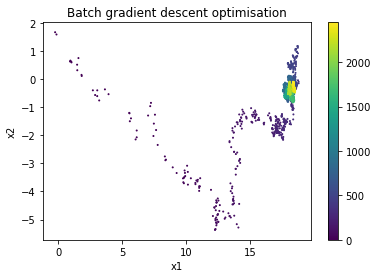

In [12]:
print("Optimal values",theta)

x1,x2=zip(*thetas)

plt.scatter(x1,x2,s=1,c=list(range(len(thetas))))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Batch gradient descent optimisation")
plt.colorbar()
plt.show()